In [97]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=50)

target_names = lfw_people.target_names
print(f'number of people: {target_names.shape[0]}')

number of people: 12


In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    lfw_people.data, lfw_people.target, test_size=0.3, random_state=7)

print(f'Number of rows in each data set -> all: {lfw_people.data.shape[0]}, train: {x_train.shape[0]}, test: {x_test.shape[0]}')

Number of rows in each data set -> all: 1560, train: 1092, test: 468


Dane zostały podzielone na dwa podzbiory: 1092 elementów danych treningowych i 468 danych testowych

In [99]:
from sklearn.decomposition import PCA

pca_100 = PCA(n_components=100)
pca_100.fit(x_train)
x_train_pca_100 = pca_100.transform(x_train)
x_test_pca_100 = pca_100.transform(x_test)

print(f'Dimension size for train data: {x_train_pca_100.shape[1]}, and test data: {x_test_pca_100.shape[1]}')

Dimension size for train data: 100, and test data: 100


In [100]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

mlp_clf = MLPClassifier(max_iter=500, random_state=7)
mlp_clf.fit(x_train_pca_100, y_train)
y_predict = mlp_clf.predict(x_test_pca_100)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=100, MLP classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')




#PCA_components=100, MLP classifier:
class: 0, precision: 0.8333333333333334, recall: 0.8333333333333334, f1 score: 0.8333333333333334
class: 1, precision: 0.7884615384615384, recall: 0.7884615384615384, f1 score: 0.7884615384615384
class: 2, precision: 0.7631578947368421, recall: 0.725, f1 score: 0.7435897435897436
class: 3, precision: 0.8650306748466258, recall: 0.9038461538461539, f1 score: 0.8840125391849529
class: 4, precision: 0.7674418604651163, recall: 0.7857142857142857, f1 score: 0.7764705882352941
class: 5, precision: 0.8, recall: 0.8, f1 score: 0.8
class: 6, precision: 0.375, recall: 0.5454545454545454, f1 score: 0.4444444444444444
class: 7, precision: 0.7142857142857143, recall: 0.625, f1 score: 0.6666666666666666
class: 8, precision: 0.7857142857142857, recall: 0.6875, f1 score: 0.7333333333333333
class: 9, precision: 0.8947368421052632, recall: 0.85, f1 score: 0.8717948717948718
class: 10, precision: 0.875, recall: 0.7777777777777778, f1 score: 0.8235294117647058
class: 

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_clf = SVC(random_state=7)

svm_clf.fit(x_train_pca_100, y_train)
y_predict = svm_clf.predict(x_test_pca_100)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=100, SVM classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=100, SVM classifier:
class: 0, precision: 1.0, recall: 0.5555555555555556, f1 score: 0.7142857142857143
class: 1, precision: 0.6875, recall: 0.8461538461538461, f1 score: 0.7586206896551724
class: 2, precision: 0.8076923076923077, recall: 0.525, f1 score: 0.6363636363636364
class: 3, precision: 0.5807692307692308, recall: 0.967948717948718, f1 score: 0.7259615384615384
class: 4, precision: 0.7777777777777778, recall: 0.3333333333333333, f1 score: 0.4666666666666667
class: 5, precision: 1.0, recall: 0.44, f1 score: 0.6111111111111112
class: 6, precision: 1.0, recall: 0.09090909090909091, f1 score: 0.16666666666666666
class: 7, precision: 1.0, recall: 0.375, f1 score: 0.5454545454545454
class: 8, precision: 1.0, recall: 0.0625, f1 score: 0.11764705882352941
class: 9, precision: 0.9333333333333333, recall: 0.7, f1 score: 0.8
class: 10, precision: 1.0, recall: 0.8888888888888888, f1 score: 0.9411764705882353
class: 11, precision: 0.725, recall: 0.5370370370370371, f1 score:

In [102]:
pca_50 = PCA(n_components=50)
pca_50.fit(x_train)
x_train_pca_50 = pca_50.transform(x_train)
x_test_pca_50 = pca_50.transform(x_test)

mlp_clf = MLPClassifier(max_iter=500, random_state=7)
mlp_clf.fit(x_train_pca_50, y_train)
y_predict = mlp_clf.predict(x_test_pca_50)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=50, MLP classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')



#PCA_components=50, MLP classifier:
class: 0, precision: 0.6818181818181818, recall: 0.8333333333333334, f1 score: 0.75
class: 1, precision: 0.8113207547169812, recall: 0.8269230769230769, f1 score: 0.819047619047619
class: 2, precision: 0.7647058823529411, recall: 0.65, f1 score: 0.7027027027027027
class: 3, precision: 0.8690476190476191, recall: 0.9358974358974359, f1 score: 0.9012345679012346
class: 4, precision: 0.6046511627906976, recall: 0.6190476190476191, f1 score: 0.611764705882353
class: 5, precision: 0.72, recall: 0.72, f1 score: 0.72
class: 6, precision: 0.5, recall: 0.45454545454545453, f1 score: 0.47619047619047616
class: 7, precision: 0.9166666666666666, recall: 0.6875, f1 score: 0.7857142857142857
class: 8, precision: 0.75, recall: 0.5625, f1 score: 0.6428571428571429
class: 9, precision: 0.782608695652174, recall: 0.9, f1 score: 0.8372093023255814
class: 10, precision: 0.9375, recall: 0.8333333333333334, f1 score: 0.8823529411764706
class: 11, precision: 0.72, recall: 

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_clf = SVC(random_state=7)

svm_clf.fit(x_train_pca_50, y_train)
y_predict = svm_clf.predict(x_test_pca_50)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=50, SVM classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=50, SVM classifier:
class: 0, precision: 0.9090909090909091, recall: 0.5555555555555556, f1 score: 0.6896551724137931
class: 1, precision: 0.6376811594202898, recall: 0.8461538461538461, f1 score: 0.7272727272727273
class: 2, precision: 0.8, recall: 0.5, f1 score: 0.6153846153846154
class: 3, precision: 0.6088709677419355, recall: 0.967948717948718, f1 score: 0.7475247524752475
class: 4, precision: 0.7142857142857143, recall: 0.35714285714285715, f1 score: 0.47619047619047616
class: 5, precision: 0.8181818181818182, recall: 0.36, f1 score: 0.5
class: 6, precision: 1.0, recall: 0.09090909090909091, f1 score: 0.16666666666666666
class: 7, precision: 1.0, recall: 0.4375, f1 score: 0.6086956521739131
class: 8, precision: 0.5, recall: 0.0625, f1 score: 0.1111111111111111
class: 9, precision: 0.9285714285714286, recall: 0.65, f1 score: 0.7647058823529411
class: 10, precision: 0.9375, recall: 0.8333333333333334, f1 score: 0.8823529411764706
class: 11, precision: 0.674418604651

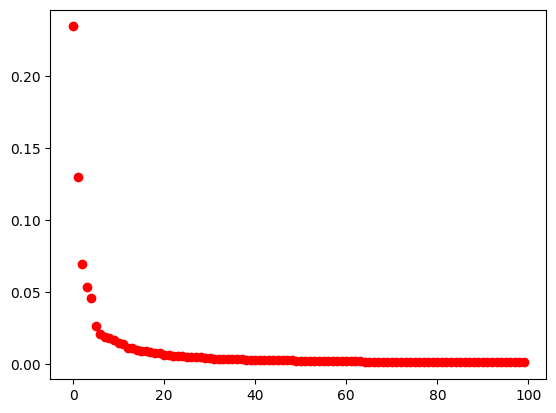

variation sum for first 10 components: 0.6326644942164421
variation sum for first 20 components: 0.7325069177895784
variation sum for first 50 components: 0.8400942874141037
variation sum for first 100 components: 0.9082795744179748


In [104]:
import matplotlib.pyplot as plt

variance_ratio = pca_100.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(f'variation sum for first 10 components: {sum(variance_ratio[:10])}')
print(f'variation sum for first 20 components: {sum(variance_ratio[:20])}')
print(f'variation sum for first 50 components: {sum(variance_ratio[:50])}')
print(f'variation sum for first 100 components: {sum(variance_ratio[:100])}')

In [105]:
pca_20 = PCA(n_components=20)
pca_20.fit(x_train)
x_train_pca_20 = pca_20.transform(x_train)
x_test_pca_20 = pca_20.transform(x_test)

mlp_clf = MLPClassifier(max_iter=1000, random_state=7)
mlp_clf.fit(x_train_pca_20, y_train)
y_predict = mlp_clf.predict(x_test_pca_20)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict)
print('#PCA_components=20, MLP classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=20, MLP classifier:
class: 0, precision: 0.38095238095238093, recall: 0.4444444444444444, f1 score: 0.41025641025641024
class: 1, precision: 0.5573770491803278, recall: 0.6538461538461539, f1 score: 0.6017699115044248
class: 2, precision: 0.5806451612903226, recall: 0.45, f1 score: 0.5070422535211268
class: 3, precision: 0.779874213836478, recall: 0.7948717948717948, f1 score: 0.7873015873015873
class: 4, precision: 0.4857142857142857, recall: 0.40476190476190477, f1 score: 0.44155844155844154
class: 5, precision: 0.5, recall: 0.52, f1 score: 0.5098039215686274
class: 6, precision: 0.1875, recall: 0.2727272727272727, f1 score: 0.2222222222222222
class: 7, precision: 0.6428571428571429, recall: 0.5625, f1 score: 0.6
class: 8, precision: 0.4166666666666667, recall: 0.3125, f1 score: 0.35714285714285715
class: 9, precision: 0.6842105263157895, recall: 0.65, f1 score: 0.6666666666666666
class: 10, precision: 0.8125, recall: 0.7222222222222222, f1 score: 0.7647058823529411
c

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_clf = SVC(random_state=7)

svm_clf.fit(x_train_pca_20, y_train)
y_predict = svm_clf.predict(x_test_pca_20)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_predict, zero_division=0)
print('#PCA_components=20, SVM classifier:')
for i in range(len(precision)):
    print(f'class: {i}, precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')

precision_avg, recall_avg, f1_score_avg, _ = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print(f'avg-values -> precision: {precision[i]}, recall: {recall[i]}, f1 score: {fscore[i]}')


#PCA_components=20, SVM classifier:
class: 0, precision: 0.0, recall: 0.0, f1 score: 0.0
class: 1, precision: 0.48, recall: 0.6923076923076923, f1 score: 0.5669291338582677
class: 2, precision: 0.782608695652174, recall: 0.45, f1 score: 0.5714285714285714
class: 3, precision: 0.5068027210884354, recall: 0.9551282051282052, f1 score: 0.6622222222222223
class: 4, precision: 0.4, recall: 0.047619047619047616, f1 score: 0.0851063829787234
class: 5, precision: 0.6666666666666666, recall: 0.16, f1 score: 0.25806451612903225
class: 6, precision: 0.0, recall: 0.0, f1 score: 0.0
class: 7, precision: 0.875, recall: 0.4375, f1 score: 0.5833333333333334
class: 8, precision: 0.0, recall: 0.0, f1 score: 0.0
class: 9, precision: 0.8571428571428571, recall: 0.3, f1 score: 0.4444444444444444
class: 10, precision: 0.9375, recall: 0.8333333333333334, f1 score: 0.8823529411764706
class: 11, precision: 0.6363636363636364, recall: 0.3888888888888889, f1 score: 0.4827586206896552
avg-values -> precision: 0.6

/Users/mwardynski/Documents/ds/eksploracja_danych/labs/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


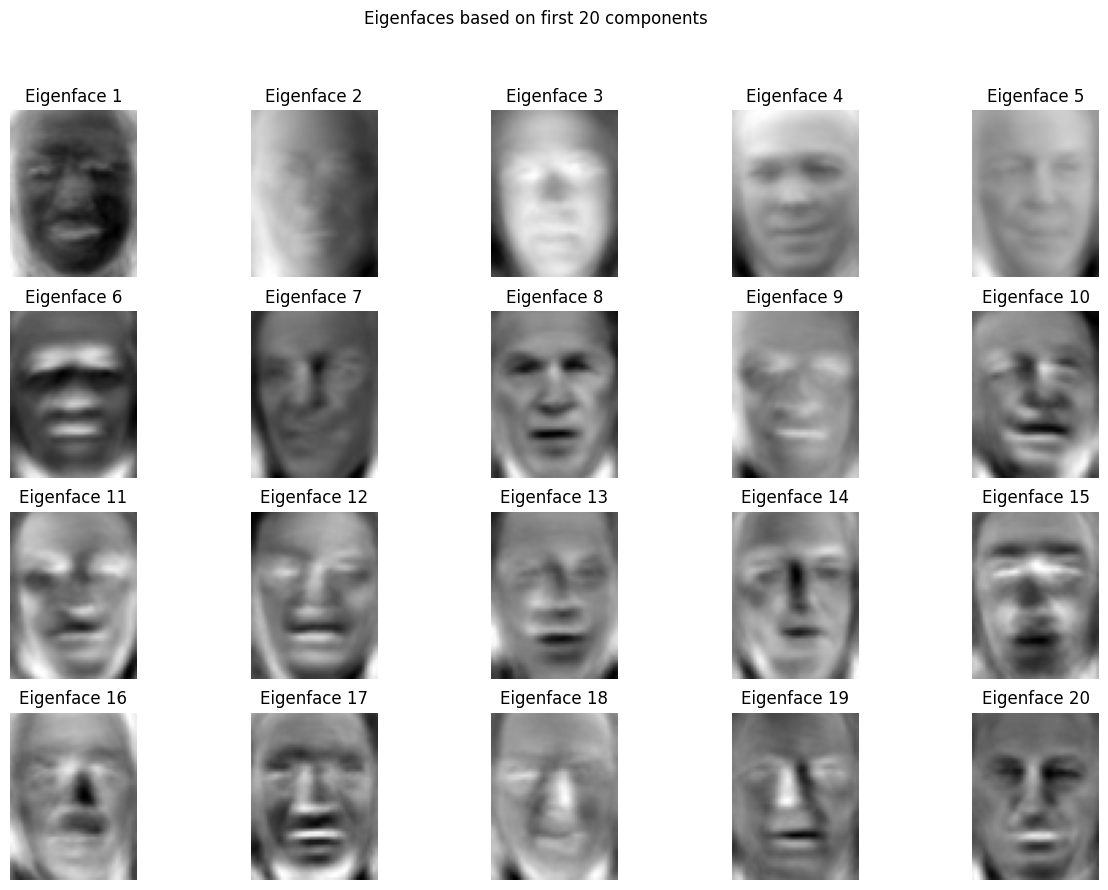

In [107]:
h, w = lfw_people.images[0].shape
eigenfaces = pca_20.components_[:20].reshape(-1, h, w)

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.suptitle('Eigenfaces based on first 20 components')
plt.show()